##### Try to classify handwritten digits of the MNIST dataset using different classification models

In [10]:
# package import

import time

# numerical and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# model creation
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# model validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV

The dataset is provided as two files one for train set and the other for test set

In [2]:
train_set = pd.read_csv('data/mnist-in-csv/mnist_train.csv')
test_set = pd.read_csv('data/mnist-in-csv/mnist_test.csv')

In [3]:
print(train_set.shape)

(60000, 785)


In [4]:
print(test_set.shape)

(10000, 785)


The train set consists of 60000 samples and the test set consists of 10000 samples. Each sample consist of 785 columns where the first column represents the actual digit label and the remaining 784 columns represents the (28 * 28) pixel values ranging from 0 to 255 that forms the image of the digit

In [5]:
train_set.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we can check the distribution of the labels to check whether the dataset is biased towards any particular digit.

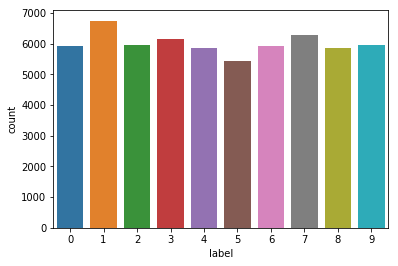

In [6]:
sns.countplot(x=train_set['label'])

the given examples are mostly evenly distributed.

In [7]:
train_set['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

##### visualization

In [8]:
idx = np.random.randint(0, 1000, 16)

In [9]:
def display_img(X):
    fig, ax = plt.subplots(4, 4, figsize = (8, 8))

    for i, axi in enumerate(ax.flat):
        img = X.iloc[i][1:].values.reshape((28, 28))
        axi.imshow(img, cmap='gray')
        axi.set_title(f'digit : {X.iloc[i][0]}')
        axi.set(xticks=[], yticks=[])

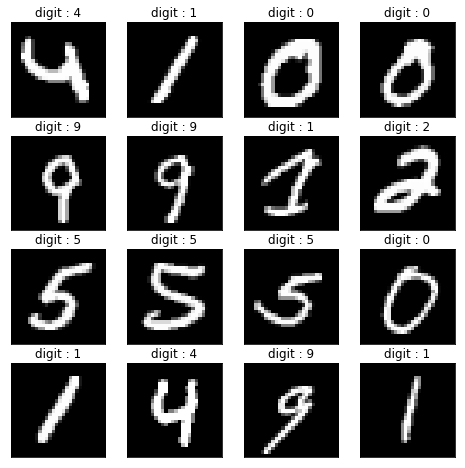

In [10]:
display_img(train_set.iloc[idx])

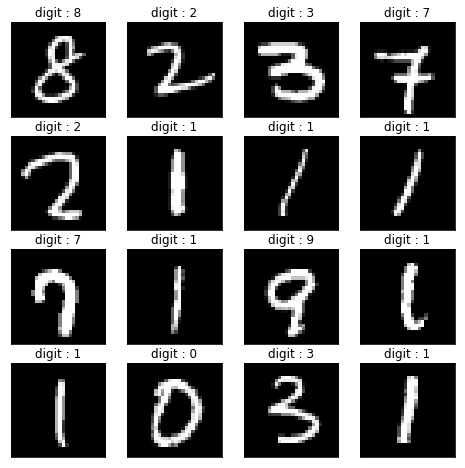

In [11]:
display_img(test_set.iloc[idx])

##### preprocessing

lets us seperate the data set into feature and target.

In [3]:
X_train = train_set.iloc[:, 1:]
X_test  = test_set.iloc[:, 1:]
y_train = train_set.iloc[:, 0]
y_test  = test_set.iloc[:, 0]

as our feature values are in the range of 0 to 255 , we have to bring the values to a similar scale.

In [4]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

X_train /= 255.0
X_test /= 255.0

##### model creation

In [5]:
# method to evaluate the model performance

def evaluate_model(y_predict, y_test, model):
    print(f'model used : {model}')
    print('classfication_report')
    print(classification_report(y_predict, y_test))
    print('confusion matrix : ')
    print(confusion_matrix(y_predict, y_test))
    print('accuray : ', accuracy_score(y_predict, y_test))
    print('___' * 30)
    print()

In [6]:
# utility method the check for different types of algorithms.

def fit_model(model, model_name , X_train, y_train, X_test, y_test):
    
    s_time = time.time()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f'time taken is : {time.time() - s_time}')
    evaluate_model(y_predict, y_test, model_name)
    

#### GaussianNB

In [64]:
fit_model(GaussianNB(), 'Gaussian', X_train, y_train, X_test, y_test)

time taken is : 3.874485969543457
model used : Gaussian
classfication_report
             precision    recall  f1-score   support

          0       0.89      0.79      0.84      1101
          1       0.95      0.85      0.90      1276
          2       0.26      0.90      0.40       294
          3       0.35      0.71      0.47       498
          4       0.17      0.88      0.29       190
          5       0.05      0.55      0.09        80
          6       0.93      0.65      0.77      1377
          7       0.27      0.88      0.42       319
          8       0.67      0.28      0.40      2280
          9       0.95      0.37      0.53      2585

avg / total       0.78      0.56      0.59     10000

confusion matrix : 
[[ 870    0   79   32   19   71   12    0   13    5]
 [   0 1079   25   39    2   25   12   15   72    7]
 [   3    2  266    6    5    1    3    2    3    3]
 [   5    1   91  353    4   20    1   10    7    6]
 [   2    0    5    2  168    3    1    5    3    1]

#### MultinomialNB - we can assume that each image is made of 784 symbols and each symbol value represents the frequency of that symbol

In [65]:
for alpha in (1, 0):
    fit_model(MultinomialNB(alpha=alpha), 'MultinomialNB with alpha '+str(alpha), X_train, y_train, X_test, y_test)

time taken is : 0.22680926322937012
model used : MultinomialNB with alpha 1
classfication_report
             precision    recall  f1-score   support

          0       0.93      0.92      0.93       987
          1       0.93      0.91      0.92      1165
          2       0.83      0.90      0.86       955
          3       0.84      0.80      0.82      1071
          4       0.74      0.84      0.79       866
          5       0.66      0.87      0.75       677
          6       0.90      0.89      0.89       970
          7       0.84      0.93      0.88       922
          8       0.80      0.66      0.72      1174
          9       0.85      0.71      0.77      1213

avg / total       0.84      0.84      0.83     10000

confusion matrix : 
[[ 912    0   15    4    2   23   18    1    6    6]
 [   0 1061   11   11    2   12   13   21   26    8]
 [   2    5  858   34    6    6   17   11   13    3]
 [   6    9   24  852    0  108    1    5   55   11]
 [   1    0   10    1  731   18 

/Users/sivabalanm/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


#### PCA

In [7]:
pca = PCA(0.95)
pca.fit(X_train) # first fit pca to train set to get the n_components. then transform both train and test set

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.n_components_

154

this means 95% of the variance in our dataset can be preserved by have 154 dimensions out of our 784 dimensions

In [9]:
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

In [70]:
fit_model(GaussianNB(), 'GaussianNB after PCA', X_train_trans, y_train, X_test_trans, y_test)

time taken is : 0.4348158836364746
model used : GaussianNB after PCA
classfication_report
             precision    recall  f1-score   support

          0       0.92      0.94      0.93       960
          1       0.95      0.98      0.96      1093
          2       0.84      0.72      0.78      1199
          3       0.85      0.81      0.83      1069
          4       0.85      0.89      0.87       937
          5       0.85      0.83      0.84       907
          6       0.89      0.94      0.91       905
          7       0.82      0.92      0.87       926
          8       0.86      0.86      0.86       970
          9       0.84      0.82      0.83      1034

avg / total       0.87      0.87      0.87     10000

confusion matrix : 
[[ 899    3   15    3    0    5    8    4   13   10]
 [   0 1073    0    0    0    0    1   17    0    2]
 [  51    5  865   45   45   17   55   46   36   34]
 [   2    7   75  862    1   60    2   14   37    9]
 [   0   13    8    1  834    5    8   

multinomialNB with PCA was giving error as our dataset contains negative values after transformation and frequency cannot be a negative value

#### Kmeans

In [73]:
fit_model(KMeans(n_clusters=10, verbose=0, random_state=40), 'Kmeans', X_train, y_train, X_test, y_test)

time taken is : 108.07987713813782
model used : Kmeans
classfication_report
             precision    recall  f1-score   support

          0       0.02      0.02      0.02      1093
          1       0.00      0.00      0.00      1427
          2       0.02      0.03      0.03       929
          3       0.02      0.03      0.02       547
          4       0.00      0.00      0.00      1314
          5       0.06      0.04      0.05      1550
          6       0.02      0.02      0.02       799
          7       0.00      0.00      0.00       495
          8       0.03      0.03      0.03       996
          9       0.01      0.01      0.01       850

avg / total       0.02      0.02      0.02     10000

confusion matrix : 
[[ 17   1  28 145   4 278  18   1 588  13]
 [  3   0  11   7 310  71   1 602  35 387]
 [ 30   2  25   7  36  19 795   1  10   4]
 [421   0  20  19   1  40  24   1  11  10]
 [ 48   2  64 696   0 287   2   0 208   7]
 [  4   0  30  15 559  56  22 292  31 541]
 [  2  

kmeans on our original dataset is not providing good performance. We will try Kmeans with PCA transformed dataset.

In [74]:
fit_model(KMeans(n_clusters=10, random_state=40), 'Kmeans with PCA', X_train_trans, y_train, X_test_trans, y_test)

time taken is : 21.622272968292236
model used : Kmeans with PCA
classfication_report
             precision    recall  f1-score   support

          0       0.01      0.01      0.01       856
          1       0.00      0.00      0.00      1546
          2       0.03      0.03      0.03      1092
          3       0.69      0.53      0.60      1311
          4       0.04      0.04      0.04       929
          5       0.08      0.05      0.06      1426
          6       0.02      0.02      0.02       800
          7       0.06      0.06      0.06       995
          8       0.01      0.01      0.01       496
          9       0.01      0.02      0.01       549

avg / total       0.12      0.09      0.10     10000

confusion matrix : 
[[  5 468  84   7  38 108  31  58  46  11]
 [  4   0  30  15 557  55  21 292  31 541]
 [ 17   1  28 146   4 278  18   1 586  13]
 [ 48   2  64 694   0 287   3   0 206   7]
 [ 30   2  25   7  36  19 795   1  10   4]
 [  3   0  11   7 311  68   1 602  36 387

the transformation did not help. lets try finding the 10 principal components of our dataset using pca and apply kmeans on it

In [76]:
pca1 = PCA(n_components=10)
kmeans = KMeans(n_clusters=10, random_state=40)
pipeline = Pipeline([ ('pca', pca1), ('kmeans', kmeans)])
fit_model(pipeline, 'kmeans on 10 principal components', X_train, y_train, X_test, y_test)

time taken is : 14.224168062210083
model used : kmeans on 10 principal components
classfication_report
             precision    recall  f1-score   support

          0       0.37      0.66      0.48       557
          1       0.00      0.00      0.00      1535
          2       0.01      0.01      0.01       562
          3       0.00      0.00      0.00       883
          4       0.05      0.06      0.05       841
          5       0.25      0.23      0.24       996
          6       0.07      0.05      0.06      1217
          7       0.01      0.02      0.01       807
          8       0.04      0.03      0.04      1339
          9       0.01      0.01      0.01      1263

avg / total       0.07      0.08      0.07     10000

confusion matrix : 
[[366   0  22  22   1  89  34   1  13   9]
 [  4   0  24  17 553  61  26 286  27 537]
 [512   0   6   0   2  12  16   1  10   3]
 [ 26   1  32   4  45  12 745   1  13   4]
 [  4 489  51   9  47 106  16  51  56  12]
 [ 11   1  31 142   2 2

#### SVM

lets try both linear and rbg kernels.

In [10]:
for kernel in ('linear', 'rbf'):
    fit_model(SVC(C = 3, kernel=kernel), 'svm with kernel : '+kernel, X_train_trans, y_train, X_test_trans, y_test )

time taken is : 249.75179195404053
model used : svm with kernel : linear
classfication_report
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1005
          1       0.99      0.97      0.98      1151
          2       0.94      0.92      0.93      1057
          3       0.93      0.91      0.92      1034
          4       0.96      0.94      0.95      1002
          5       0.90      0.93      0.91       869
          6       0.95      0.97      0.96       945
          7       0.94      0.95      0.94      1010
          8       0.92      0.93      0.92       956
          9       0.91      0.95      0.93       971

avg / total       0.94      0.94      0.94     10000

confusion matrix : 
[[ 962    0    7    4    0   11   10    1    5    5]
 [   0 1122    6    1    1    4    2    6    5    4]
 [   3    3  973   16    7    6   13   26    8    2]
 [   3    3    9  943    1   34    1    5   24   11]
 [   1    0    5    1  940    3    

as expected rbf kernel is performing well with our data that linear kernel as rbf if more suitable complex non-linear classification as in case of our dataset.We can play around with the parameters C and gamma to try improving the model.We can also use GridSearchCV to evaluate all possibile combination. In my case i think my system has low configuration that running GridsearchCV is getting struck and not giving any o/p

#### Random forest

In [9]:
fit_model(RandomForestClassifier(), 'randomforestclassifier', X_train, y_train, X_test, y_test)

time taken is : 6.073622941970825
model used : randomforestclassifier
classfication_report
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1009
          1       0.99      0.98      0.98      1142
          2       0.95      0.95      0.95      1033
          3       0.94      0.93      0.93      1027
          4       0.96      0.95      0.95       991
          5       0.93      0.94      0.93       882
          6       0.96      0.97      0.97       950
          7       0.95      0.95      0.95      1028
          8       0.92      0.93      0.93       960
          9       0.92      0.95      0.93       978

avg / total       0.95      0.95      0.95     10000

confusion matrix : 
[[ 964    1    8    6    1    8    8    0    6    7]
 [   1 1121    1    1    2    1    4    4    1    6]
 [   3    2  979   11    4    1    5   16   10    2]
 [   1    3    7  950    3   28    0    3   15   17]
 [   0    1    5    0  938    4    7  

In [15]:
# lets try it on our transformed dataset 
fit_model(RandomForestClassifier(), 'randomforestclassifier', X_train_trans, y_train, X_test_trans, y_test)

time taken is : 10.76217007637024
model used : randomforestclassifier
classfication_report
             precision    recall  f1-score   support

          0       0.97      0.89      0.93      1069
          1       0.98      0.97      0.97      1147
          2       0.89      0.87      0.88      1062
          3       0.88      0.84      0.86      1061
          4       0.91      0.86      0.88      1035
          5       0.84      0.87      0.85       858
          6       0.92      0.94      0.93       935
          7       0.89      0.93      0.91       990
          8       0.82      0.88      0.85       900
          9       0.85      0.90      0.87       943

avg / total       0.90      0.90      0.90     10000

confusion matrix : 
[[ 952    4   19   13    5   23   21    6   15   11]
 [   0 1112    6    3    5    2    4   10    1    4]
 [   5    6  919   27   16   20   14   20   29    6]
 [   4    2   22  889    9   59    6    8   47   15]
 [   1    0   12    3  891    5   12  

random forest performs well with many features as it will be able to create highly uncorrelated decision trees with subsets of different features and would thus end up in a better model when aggregating these trees.

#### Neural networks

In [14]:
fit_model(MLPClassifier(hidden_layer_sizes=(100,)), 'MLP classifier', X_train, y_train, X_test, y_test)

time taken is : 90.60343098640442
model used : MLP classifier
classfication_report
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1001
          1       0.99      0.98      0.99      1147
          2       0.97      0.97      0.97      1025
          3       0.96      0.98      0.97       998
          4       0.99      0.97      0.98      1000
          5       0.97      0.97      0.97       895
          6       0.98      0.97      0.98       972
          7       0.97      0.97      0.97      1027
          8       0.95      0.97      0.96       955
          9       0.96      0.99      0.97       980

avg / total       0.97      0.97      0.97     10000

confusion matrix : 
[[ 972    0    5    1    0    3    3    1   12    4]
 [   0 1124    2    1    0    1    2    8    2    7]
 [   0    4  996    9    2    0    1   11    2    0]
 [   0    0    3  974    0    6    1    2    6    6]
 [   0    0    6    2  970    2    3    2    7

considering the accuracy and execution score , MLPClassifier provides a better result for our digit classification problem.
I am just a beginner in ML, so do provide your suggestion on any improvisations on the way this problem can be approached.thank you